# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objectives

At the end of the experiment, you will be able to :

*  understand Decision Tree


## Dataset

### Description


In this experiment we will be using a Zoo dataset. The "type" attribute appears to be the class attribute. Here is a breakdown of which animals are in which type:


1 -- Mammals (41) aardvark, antelope, bear, boar, buffalo, calf, cavy, cheetah, deer, dolphin, elephant, fruitbat, giraffe, girl, goat, gorilla, hamster, hare, leopard, lion, lynx, mink, mole, mongoose, opossum, oryx, platypus, polecat, pony, porpoise, puma, pussycat, raccoon, reindeer, seal, sealion, squirrel, vampire, vole, wallaby,wolf 

2 -- Birds (20) chicken, crow, dove, duck, flamingo, gull, hawk, kiwi, lark, ostrich, parakeet, penguin, pheasant, rhea, skimmer, skua, sparrow, swan, vulture, wren 

3 -- Reptiles (5) pitviper, seasnake, slowworm, tortoise, tuatara 

4 -- Aquatic (13) bass, carp, catfish, chub, dogfish, haddock, herring, pike, piranha, seahorse, sole, stingray, tuna 

5 -- Amphibians (4) frog, frog, newt, toad 

6 -- Insects (8) flea, gnat, honeybee, housefly, ladybird, moth, termite, wasp 

7 -- Arthropods (10) clam, crab, crayfish, lobster, octopus, scorpion, seawasp, slug, starfish, worm



## AI / ML Technique

### Decision Tree

As the name says, it is a tree which helps by assisting us in decision-making. Used
for both classification and regression, it is a very basic and important predictive learning algorithm.

    1. It is different from others because it works intuitively i.e., taking decisions one-by-one.
    2. Non-Parametric: Fast and efficient.

It consists of nodes which have parent-child relationships.


The core algorithm for building decision trees is called ID3 by J. R. Quinlan. It employs a top-down, greedy search through the space of possible branches with no backtracking. ID3 uses Entropy and Information Gain to construct a decision tree.

### Keywords

* Numpy
* Pandas
* ID3 Algorithm
* Train, Test Split

#### Expected Time : 60 min

### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P181902118" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "8860303743" #@param {type:"string"}


In [0]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook="BLR_M0W1_Decision_Tree_Zoo" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch") 
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/Zoo_New.csv")
    ipython.magic("sx apt-get install graphviz")
    ipython.magic("sx pip install graphviz")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    from IPython.display import HTML
    HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id))
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


#### Importing Required Packages

In [0]:
import pandas as pd
import numpy as np
import graphviz
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split

#### Loading Dataset

In [0]:
#Import all columns omitting the fist which consists the names of the animals
dataset = pd.read_csv('Zoo_New.csv',
                      names=['animal_name','hair','feathers','eggs','milk',
                                                   'airbone','aquatic','predator','toothed','backbone',
                                                  'breathes','venomous','fins','legs','tail','domestic','catsize','class',])
#We don't use animal name for classification because it is just a string stating the 
#name and it won't provide any extra information for classification in this context
dataset=dataset.drop('animal_name',axis=1)

Let us check for the unique classes ( labels ) present in the dataset

In [67]:
np.unique(dataset['class'].values)

array([1, 2, 3, 4, 5, 6, 7])

Checking for the shape of the dataset

In [68]:
dataset.shape

(101, 17)

#### Splitting the datasets into train and test

In [0]:
training_data, testing_data = train_test_split(dataset,test_size=0.2, random_state=13)

In [70]:
training_data = training_data.values
print(training_data)

[[1 0 0 ... 0 1 1]
 [0 0 1 ... 0 0 3]
 [0 0 1 ... 0 0 6]
 ...
 [1 0 0 ... 0 1 1]
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 0 0 4]]


In [71]:
testing_data = testing_data.values
print(testing_data )

[[0 1 1 0 1 0 1 0 1 1 0 0 2 1 0 0 2]
 [1 0 0 1 1 0 0 1 1 1 0 0 2 1 0 0 1]
 [1 0 0 1 0 0 0 1 1 1 0 0 2 1 0 0 1]
 [0 0 1 0 0 1 1 0 0 0 0 0 4 0 0 0 7]
 [0 1 1 0 1 0 0 0 1 1 0 0 2 1 0 0 2]
 [1 0 0 1 0 0 0 1 1 1 0 0 4 0 1 0 1]
 [1 0 0 1 0 0 1 1 1 1 0 0 4 1 0 1 1]
 [1 0 0 1 0 0 0 1 1 1 0 0 4 1 1 1 1]
 [1 0 0 1 0 0 0 1 1 1 0 0 4 1 1 1 1]
 [0 1 1 0 1 0 0 0 1 1 0 0 2 1 1 0 2]
 [0 1 1 0 1 1 1 0 1 1 0 0 2 1 0 0 2]
 [0 0 1 0 0 1 0 1 1 1 0 0 4 0 0 0 5]
 [0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 4]
 [0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1 4]
 [0 1 1 0 0 0 1 0 1 1 0 0 2 1 0 0 2]
 [0 1 1 0 1 0 0 0 1 1 0 0 2 1 0 1 2]
 [0 0 1 0 0 0 0 0 1 1 0 0 4 1 0 1 3]
 [1 0 0 1 0 0 1 1 1 1 0 0 2 0 1 1 1]
 [1 0 0 1 0 0 1 1 1 1 0 0 4 1 0 1 1]
 [1 0 0 1 0 0 1 1 1 1 0 0 4 1 0 1 1]
 [1 0 0 1 0 0 1 1 1 1 0 0 4 0 0 1 1]]


#### Predict the class of test data

In [0]:
## Importing the package
from sklearn import tree

In [0]:
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=2018)

In [74]:
clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2018,
            splitter='best')

In [0]:
# Fitting the data
clf = clf.fit(training_data[:,:16],training_data[:,16])

In [0]:
# Calculating the labels for test data
pred = clf.predict(testing_data[:,:16])

In [0]:
# Importing library to calculate accuracy score
from sklearn.metrics import accuracy_score

In [78]:
# Calculating accuracy
accuracy_score(testing_data[:,16], pred)

0.9523809523809523

saving the trained model (tree) in a png format using graphviz and os packages

In [79]:
import os
save_dot = "output" + ".dot"
save_png = "output"+ ".png"
graph = graphviz.Source(export_graphviz(clf, out_file=save_dot, filled = True,feature_names=(list(dataset.columns))[:-1]))
os.system("dot -T png -o " + save_png + " " + save_dot)

0

Plotting the tree

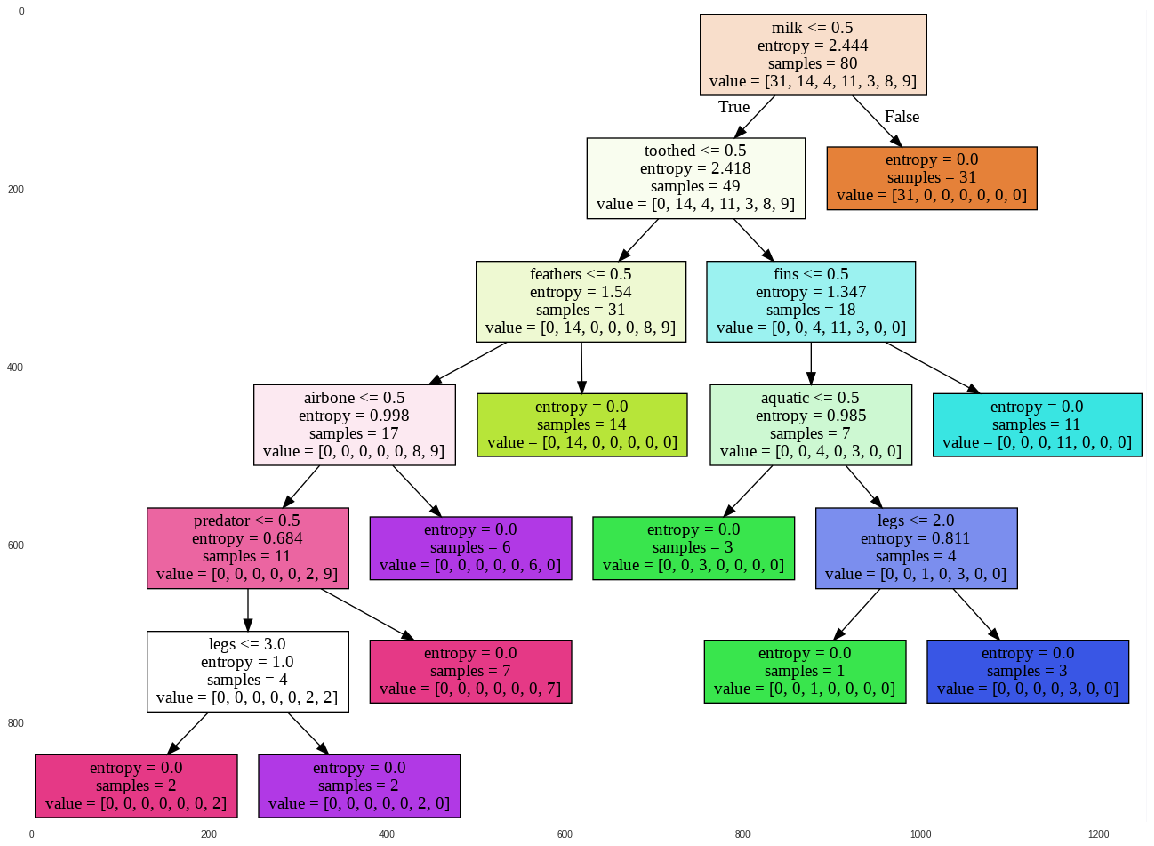

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.grid(False)
plt.imshow(plt.imread(save_png))
plt.show()

#### Exercise 1

Change the train and test split ratio and observe the change in accuracy 

In [93]:
#### Your code here
import pandas as pd
import numpy as np
import graphviz
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Import all columns omitting the fist which consists the names of the animals
dataset = pd.read_csv('Zoo_New.csv',
                      names=['animal_name','hair','feathers','eggs','milk',
                                                   'airbone','aquatic','predator','toothed','backbone',
                                                  'breathes','venomous','fins','legs','tail','domestic','catsize','class',])
#We don't use animal name for classification because it is just a string stating the 
#name and it won't provide any extra information for classification in this context
dataset=dataset.drop('animal_name',axis=1)

for each in [0.1, 0.2, 0.3, 0.4, 0.5]:
#   training_data, testing_data = train_test_split(dataset,test_size=each, random_state=13)
  training_data, testing_data = train_test_split(dataset,test_size=each)

  training_data = training_data.values
  testing_data = testing_data.values

#   clf = DecisionTreeClassifier(criterion='entropy', random_state=2018)
  clf = DecisionTreeClassifier(criterion='entropy')

  clf = clf.fit(training_data[:,:16],training_data[:,16])
  pred = clf.predict(testing_data[:,:16])
  print(accuracy_score(testing_data[:,16], pred))


0.9090909090909091
0.8095238095238095
0.9354838709677419
0.9512195121951219
0.803921568627451


#### Exercise 2

Randomly sample 50 % of the data to build a decision tree classifier.

In [94]:
#### Your code here 
#### Your code here
import pandas as pd
import numpy as np
import graphviz
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Import all columns omitting the fist which consists the names of the animals
dataset = pd.read_csv('Zoo_New.csv',
                      names=['animal_name','hair','feathers','eggs','milk',
                                                   'airbone','aquatic','predator','toothed','backbone',
                                                  'breathes','venomous','fins','legs','tail','domestic','catsize','class',])
#We don't use animal name for classification because it is just a string stating the 
#name and it won't provide any extra information for classification in this context
dataset=dataset.drop('animal_name',axis=1)

training_data, testing_data = train_test_split(dataset,test_size=0.5, random_state=13)
training_data = training_data.values
testing_data = testing_data.values

clf = DecisionTreeClassifier(criterion='entropy', random_state=2018)
clf = clf.fit(training_data[:,:16],training_data[:,16])
pred = clf.predict(testing_data[:,:16])
accuracy_score(testing_data[:,16], pred)


0.9411764705882353

### Please answer the questions below to complete the experiment:

In [0]:
#@title  Does the decision tree classifier perform well on randomized data (True / False)? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "True" #@param ["True","False"]


In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "good" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]

In [99]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 1609
Date of submission:  15 Mar 2019
Time of submission:  01:23:02
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.
